In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
df1 = pd.read_csv("D:/AI Trends/marathon_results_2017.csv", index_col=0)
df1

,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,5K,...,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division
0,11,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,NaN,NaN,0:15:25,...,1:16:59,1:33:01,1:48:19,2:02:53,0:04:57,-,2:09:37,1,1,1
1,17,"Rupp, Galen",30,M,Portland,OR,USA,NaN,NaN,0:15:24,...,1:16:59,1:33:01,1:48:19,2:03:14,0:04:58,-,2:09:58,2,2,2
2,23,"Osako, Suguru",25,M,Machida-City,NaN,JPN,NaN,NaN,0:15:25,...,1:17:00,1:33:01,1:48:31,2:03:38,0:04:59,-,2:10:28,3,3,3
3,21,"Biwott, Shadrack",32,M,Mammoth Lakes,CA,USA,NaN,NaN,0:15:25,...,1:17:00,1:33:01,1:48:58,2:04:35,0:05:03,-,2:12:08,4,4,4
4,9,"Chebet, Wilson",31,M,Marakwet,NaN,KEN,NaN,NaN,0:15:25,...,1:16:59,1:33:01,1:48:41,2:05:00,0:05:04,-,2:12:35,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26405,25166,"Steinbach, Paula Eyvonne",61,F,Ontario,CA,USA,NaN,MI,0:46:44,...,4:12:06,5:03:08,5:55:18,6:46:57,0:16:24,-,7:09:39,26407,11972,344
26406,25178,"Avelino, Andrew R.",25,M,Fayetteville,NC,USA,NaN,MI,0:32:03,...,3:50:19,4:50:01,5:53:48,6:54:21,0:16:40,-,7:16:59,26408,14436,4774
26407,27086,"Hantel, Johanna",57,F,Malvern,PA,USA,NaN,NaN,0:53:11,...,4:15:21,5:06:37,6:00:33,6:54:38,0:16:47,-,7:19:37,26409,11973,698
26408,25268,"Reilly, Bill",64,M,New York,NY,USA,NaN,MI,0:40:34,...,4:06:10,5:07:09,6:06:07,6:56:08,0:16:49,-,7:20:44,26410,14437,1043


In [3]:
df2 = pd.read_csv("D:/AI Trends/marathon_results_2016.csv", index_col=0)
df2

,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 8,5K,10K,...,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division
Bib,,,,,,,,,,,,,,,,,,,,,
5,"Hayle, Lemi Berhanu",21,M,Addis Ababa,NaN,ETH,NaN,NaN,0:15:47,0:31:20,...,1:19:15,1:34:17,1:50:24,2:05:59,0:05:04,2:12:45,2:12:45,1,1,1
1,"Desisa, Lelisa",26,M,Ambo,NaN,ETH,NaN,NaN,0:15:47,0:31:21,...,1:19:15,1:34:17,1:50:24,2:05:59,0:05:06,2:13:32,2:13:32,2,2,2
6,"Tsegay, Yemane Adhane",31,M,Addis Ababa,NaN,ETH,NaN,NaN,0:15:46,0:31:20,...,1:19:15,1:34:45,1:50:48,2:06:47,0:05:07,2:14:02,2:14:02,3,3,3
11,"Korir, Wesley",33,M,Kitale,NaN,KEN,NaN,NaN,0:15:46,0:31:21,...,1:19:16,1:34:45,1:50:48,2:06:47,0:05:07,2:14:05,2:14:05,4,4,4
14,"Lonyangata, Paul",23,M,Eldoret,NaN,KEN,NaN,NaN,0:15:46,0:31:21,...,1:19:18,1:34:46,1:51:30,2:08:11,0:05:11,2:15:45,2:15:45,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31985,"Weidenkeller, Tina M.",46,F,Rossmoor,CA,USA,NaN,NaN,0:47:03,1:32:01,...,4:27:32,5:24:12,6:29:20,-,0:17:51,7:47:56,7:47:56,26625,12164,1900
26218,"Marseilles, Jami E.",47,F,Huntington Beach,CA,USA,NaN,MI,0:47:04,1:32:02,...,4:27:33,5:24:12,6:29:21,7:25:15,0:17:51,7:47:56,7:47:56,26626,12165,1901
29403,"Ganem, William J.",39,M,Reedsburg,WI,USA,NaN,MI,0:42:22,1:29:49,...,4:25:53,5:29:27,6:42:04,7:54:21,0:19:13,8:23:27,8:23:27,26627,14462,4801


In [4]:
df3 = pd.read_csv("D:/AI Trends/marathon_results_2015.csv", index_col=0)
df3

,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,5K,...,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division
0,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,NaN,0:14:43,...,1:16:07,1:32:00,1:47:59,2:02:39,0:04:56,-,2:09:17,1,1,1
1,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,NaN,0:14:43,...,1:16:07,1:31:59,1:47:59,2:02:42,0:04:58,-,2:09:48,2,2,2
2,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,NaN,NaN,0:14:43,...,1:16:07,1:32:00,1:47:59,2:03:01,0:04:59,-,2:10:22,3,3,3
3,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,NaN,NaN,0:14:43,...,1:16:07,1:32:00,1:48:03,2:03:47,0:05:00,-,2:10:47,4,4,4
4,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,NaN,NaN,0:14:43,...,1:16:07,1:32:00,1:47:59,2:03:27,0:05:00,-,2:10:49,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26593,25656,"Prescott, Francine J.",64,F,Boynton Beach,FL,USA,NaN,MI,0:50:15,...,4:25:53,5:19:44,6:17:19,7:13:34,0:17:31,-,7:38:56,26594,12015,269
26594,31359,"Emerson, Annette C.",61,F,Old Town,ME,USA,NaN,NaN,0:48:36,...,4:32:44,5:31:58,6:28:56,7:26:19,0:17:59,-,7:51:30,26595,12016,270
26595,25559,"Cerveny, Nona",66,F,Scottsdale,AZ,USA,NaN,NaN,0:53:03,...,4:33:51,5:38:56,6:38:51,7:36:18,0:18:18,-,7:59:33,26596,12017,91
26596,29396,"Buccilli, Alfred P.",53,M,Lynnfield,MA,USA,NaN,NaN,0:49:04,...,4:29:20,5:31:11,6:33:35,7:35:38,0:18:20,-,8:00:37,26597,14580,2055


In [5]:
df=pd.concat([df1,df2,df3])
df

,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,5K,...,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division,Unnamed: 8
0,11,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,NaN,NaN,0:15:25,...,1:33:01,1:48:19,2:02:53,0:04:57,-,2:09:37,1,1,1,NaN
1,17,"Rupp, Galen",30,M,Portland,OR,USA,NaN,NaN,0:15:24,...,1:33:01,1:48:19,2:03:14,0:04:58,-,2:09:58,2,2,2,NaN
2,23,"Osako, Suguru",25,M,Machida-City,NaN,JPN,NaN,NaN,0:15:25,...,1:33:01,1:48:31,2:03:38,0:04:59,-,2:10:28,3,3,3,NaN
3,21,"Biwott, Shadrack",32,M,Mammoth Lakes,CA,USA,NaN,NaN,0:15:25,...,1:33:01,1:48:58,2:04:35,0:05:03,-,2:12:08,4,4,4,NaN
4,9,"Chebet, Wilson",31,M,Marakwet,NaN,KEN,NaN,NaN,0:15:25,...,1:33:01,1:48:41,2:05:00,0:05:04,-,2:12:35,5,5,5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26593,25656,"Prescott, Francine J.",64,F,Boynton Beach,FL,USA,NaN,MI,0:50:15,...,5:19:44,6:17:19,7:13:34,0:17:31,-,7:38:56,26594,12015,269,NaN
26594,31359,"Emerson, Annette C.",61,F,Old Town,ME,USA,NaN,NaN,0:48:36,...,5:31:58,6:28:56,7:26:19,0:17:59,-,7:51:30,26595,12016,270,NaN
26595,25559,"Cerveny, Nona",66,F,Scottsdale,AZ,USA,NaN,NaN,0:53:03,...,5:38:56,6:38:51,7:36:18,0:18:18,-,7:59:33,26596,12017,91,NaN
26596,29396,"Buccilli, Alfred P.",53,M,Lynnfield,MA,USA,NaN,NaN,0:49:04,...,5:31:11,6:33:35,7:35:38,0:18:20,-,8:00:37,26597,14580,2055,NaN


In [6]:
df4=df[['Pace','Official Time']]

In [7]:
df4

,Pace,Official Time
0,0:04:57,2:09:37
1,0:04:58,2:09:58
2,0:04:59,2:10:28
3,0:05:03,2:12:08
4,0:05:04,2:12:35
...,...,...
26593,0:17:31,7:38:56
26594,0:17:59,7:51:30
26595,0:18:18,7:59:33
26596,0:18:20,8:00:37


In [8]:
def convert_pace(pace_str):
    _, minutes, seconds = map(int, pace_str.split(':'))
    return minutes + seconds / 60

# Function to convert 'Official Time' (HH:MM:SS) to minutes
def convert_official_time(time_str):
    hours, minutes, seconds = map(int, time_str.split(':'))
    return hours * 60 + minutes + seconds / 60

# Apply conversions
df4['Pace'] = df4['Pace'].apply(convert_pace)
df4['Official Time'] = df4['Official Time'].apply(convert_official_time)


C:\Users\Administrator.DAI-PC2\AppData\Local\Temp\ipykernel_11900\997635076.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Pace'] = df4['Pace'].apply(convert_pace)
C:\Users\Administrator.DAI-PC2\AppData\Local\Temp\ipykernel_11900\997635076.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Official Time'] = df4['Official Time'].apply(convert_official_time)


In [9]:
df4['Pace']

0         4.950000
1         4.966667
2         4.983333
3         5.050000
4         5.066667
           ...    
26593    17.516667
26594    17.983333
26595    18.300000
26596    18.333333
26597    18.550000
Name: Pace, Length: 79638, dtype: float64

In [10]:
df4['Official Time']

0        129.616667
1        129.966667
2        130.466667
3        132.133333
4        132.583333
            ...    
26593    458.933333
26594    471.500000
26595    479.550000
26596    480.616667
26597    486.016667
Name: Official Time, Length: 79638, dtype: float64

In [11]:
X = df4[['Pace']] #Needs to be a dataframe so double brackets
y = df4['Official Time']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=24)

In [13]:
# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
#Make Predictions

y_pred = model.predict(X_test)
print(y_pred)

[233.12678978 208.67672253 211.29637259 ... 211.29637259 199.94455565
 274.1679741 ]


In [15]:
#Asses yhe model performance

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print("R-Squared: ", r2)
print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)

R-Squared:  0.9999901243949051
Mean Absolute Error:  0.11172170895658753
Mean Squared Error:  0.017072992935507302
Root Mean Squared Error:  0.13066366340917931


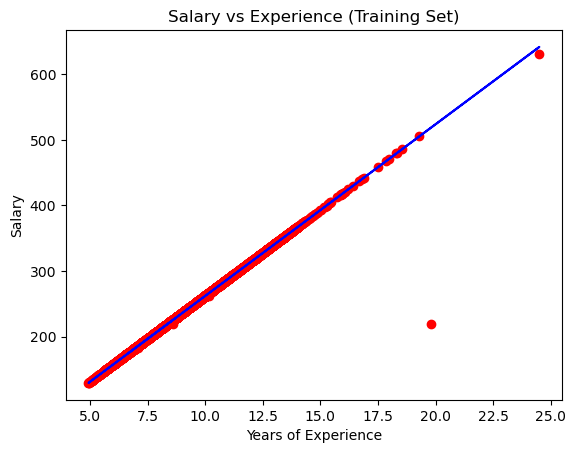

In [16]:
#Visualize training set results

plt.scatter(X_train, y_train, color='red')

#plot  regression line
plt.plot(X_train, model.predict(X_train), color='blue')
plt.title('Salary vs Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show();

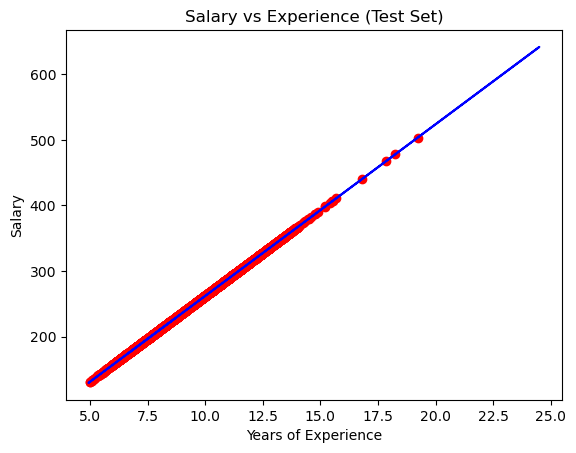

In [17]:
#VIsualize test results

plt.scatter(X_test, y_test, color='red')

#plot  regression line
plt.plot(X_train, model.predict(X_train), color='blue')
plt.title('Salary vs Experience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show();

In [18]:
#Make new Predictions

print("*** Making predictions for New data ***")

new_pace_for_predictions = [4.98, 5.67, 8.11, 12.65, 15, 19.12, 18]

for new_pace in new_pace_for_predictions:
    new_time_pred = model.predict(pd.DataFrame({'Pace':[new_pace]}))
    
    print(f"Pace : {new_pace} .... Predicted Official Time : {new_time_pred}")


*** Making predictions for New data ***
Pace : 4.98 .... Predicted Official Time : [130.43650731]
Pace : 5.67 .... Predicted Official Time : [148.51209274]
Pace : 8.11 .... Predicted Official Time : [212.43155428]
Pace : 12.65 .... Predicted Official Time : [331.36366715]
Pace : 15 .... Predicted Official Time : [392.92544363]
Pace : 19.12 .... Predicted Official Time : [500.85502623]
Pace : 18 .... Predicted Official Time : [471.51494552]


In [19]:
# Saving Model

import joblib

joblib.dump(model, 'final_time_model.pkl')

print(X)
print(X.columns)
print(list(X.columns))

            Pace
0       4.950000
1       4.966667
2       4.983333
3       5.050000
4       5.066667
...          ...
26593  17.516667
26594  17.983333
26595  18.300000
26596  18.333333
26597  18.550000

[79638 rows x 1 columns]
Index(['Pace'], dtype='object')
['Pace']


In [20]:
joblib.dump(list(X.columns), 'pace_column_names.pkl')

['pace_column_names.pkl']

In [21]:
#Loading model (Model Persistance)

col_names = joblib.load('pace_column_names.pkl')
print(col_names)

['Pace']


In [22]:
loaded_model = joblib.load('final_time_model.pkl')

In [23]:
# Make new predictions using loaded Model

print("*** Making predictions using Loaded Model for New data ***")

new_pace_for_predictions = [4.98, 5.67, 8.11, 12.65, 15, 19.12, 18]

for new_pace in new_pace_for_predictions:
    new_time_pred = loaded_model.predict(pd.DataFrame({'Pace':[new_pace]}))
    
    print(f"Pace : {new_pace} .... Predicted Official Time : {new_time_pred}")

*** Making predictions using Loaded Model for New data ***
Pace : 4.98 .... Predicted Official Time : [130.43650731]
Pace : 5.67 .... Predicted Official Time : [148.51209274]
Pace : 8.11 .... Predicted Official Time : [212.43155428]
Pace : 12.65 .... Predicted Official Time : [331.36366715]
Pace : 15 .... Predicted Official Time : [392.92544363]
Pace : 19.12 .... Predicted Official Time : [500.85502623]
Pace : 18 .... Predicted Official Time : [471.51494552]
